In [1]:
pip install pandas matplotlib seaborn jupyter

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [5]:
file_path = "C:/Users/ADMIN/Documents/CustomerAnalysis/customer_data.csv"

In [6]:
df = pd.read_csv(file_path)
df.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [7]:
print(df.isnull().sum())
df = df.dropna(thresh=3)
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes  
df.drop_duplicates(inplace=True)
print(df.dtypes)

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22104\2517332313.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_22104\2517332313.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Customer ID                int64
Purchase Date             object
Product Category          object
Product Price              int64
Quantity                   int64
Total Purchase Amount      int64
Payment Method            object
Customer Age               int64
Returns                  float64
Customer Name             object
Age                        int64
Gender                      int8
Churn                      int64
dtype: object


In [9]:
print(df.describe())
print(df['Gender'].value_counts())

         Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  250000.000000  250000.000000  250000.000000          250000.000000   
mean    25017.632092     254.742724       3.004936            2725.385196   
std     14412.515718     141.738104       1.414737            1442.576095   
min         1.000000      10.000000       1.000000             100.000000   
25%     12590.000000     132.000000       2.000000            1476.000000   
50%     25011.000000     255.000000       3.000000            2725.000000   
75%     37441.250000     377.000000       4.000000            3975.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age         Gender  \
count  250000.000000  202618.000000  250000.000000  250000.000000   
mean       43.798276       0.500824      43.798276       0.502704   
std        15.364915       0.500001      15.364915       0.499994   
min        18.000000       0.0

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

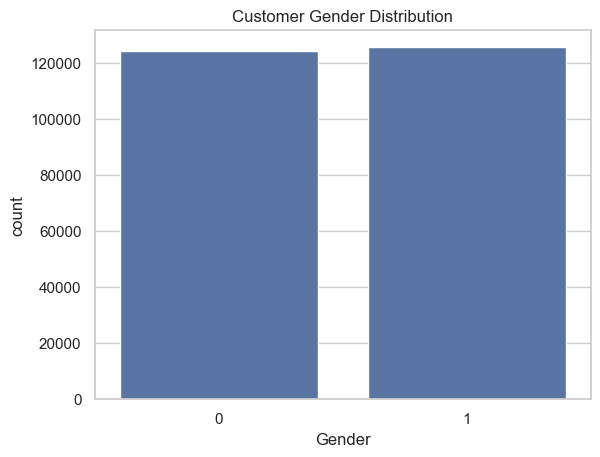

In [12]:
sns.countplot(x='Gender', data=df)
plt.title('Customer Gender Distribution')
plt.show()

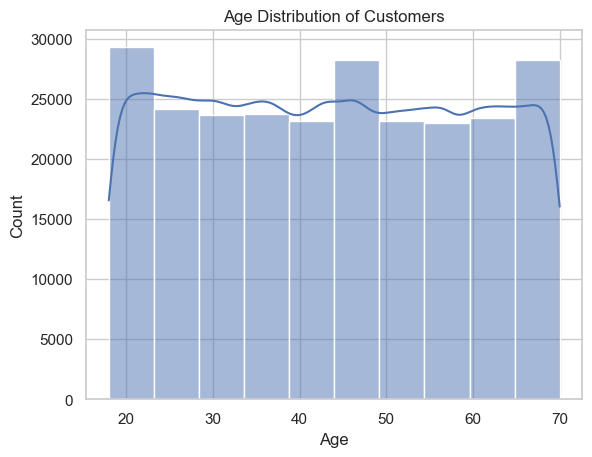

In [13]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution of Customers')
plt.show()

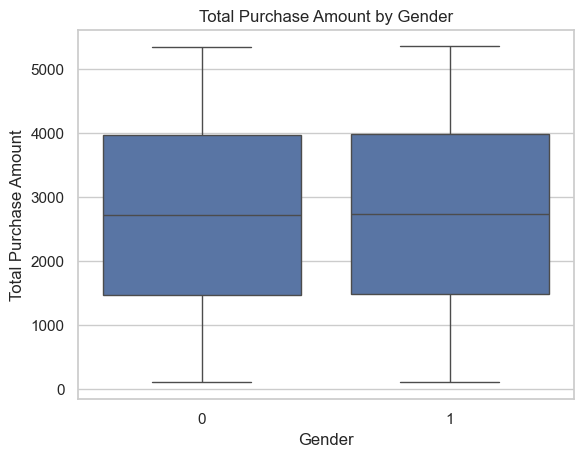

In [16]:
sns.boxplot(x='Gender', y='Total Purchase Amount', data=df)
plt.title('Total Purchase Amount by Gender')
plt.show()

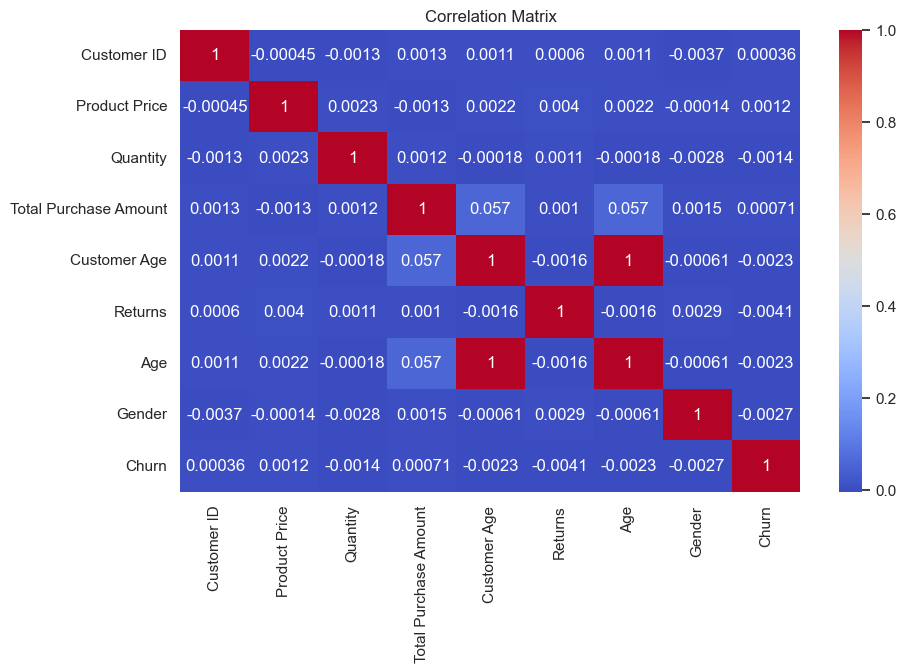

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()